## RNN 股价预测实战

In [1]:
import pandas as pd
df = pd.read_csv('../data/600030.csv', parse_dates=['trade_date'], index_col='trade_date')

<Axes: xlabel='trade_date'>

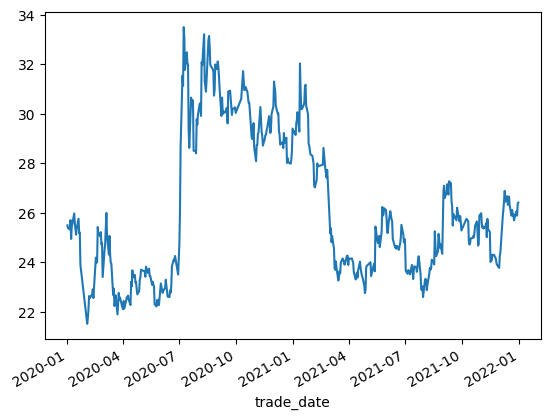

In [3]:
df.sort_index(ascending=True, inplace=True)
data=df['close']
data
data.plot()

In [6]:
train_data=data['2020-01-02':'2021-10-08']
train_data[:10]

trade_date
2020-01-02    25.49
2020-01-03    25.38
2020-01-06    25.32
2020-01-07    25.70
2020-01-08    24.94
2020-01-09    25.44
2020-01-10    25.55
2020-01-13    25.97
2020-01-14    25.56
2020-01-15    25.32
Name: close, dtype: float64

In [7]:
test_data=data['2021-10-09':]
test_data[:10]

trade_date
2021-10-11    25.66
2021-10-12    24.86
2021-10-13    24.71
2021-10-14    24.76
2021-10-15    24.96
2021-10-18    24.98
2021-10-19    25.05
2021-10-20    25.00
2021-10-21    25.16
2021-10-22    25.46
Name: close, dtype: float64

In [ ]:
from torch.utils.data import Dataset

SEQ_LEN=5
BATCH_SIZE=1
HIDDEN_SIZE=128

class dataset(Dataset):
    def __init__(self,data,seq_length):
        self.seq_length=seq_length
        self.data=(data.values-data.values.min())/(data.values.max()-data.values.min())
